In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api  as smf

In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
## EDA and Data Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<ipython-input-4-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

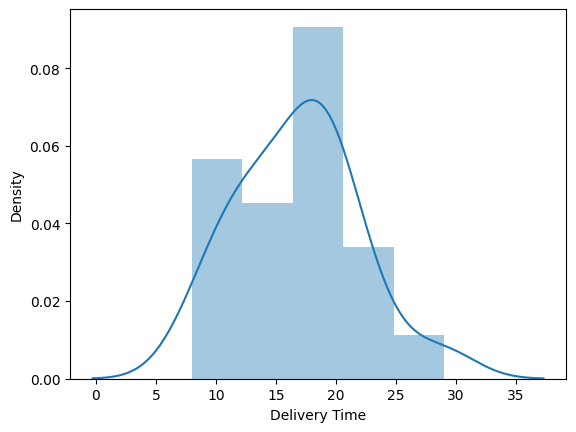

In [4]:
sns.distplot(data['Delivery Time'])

<ipython-input-5-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

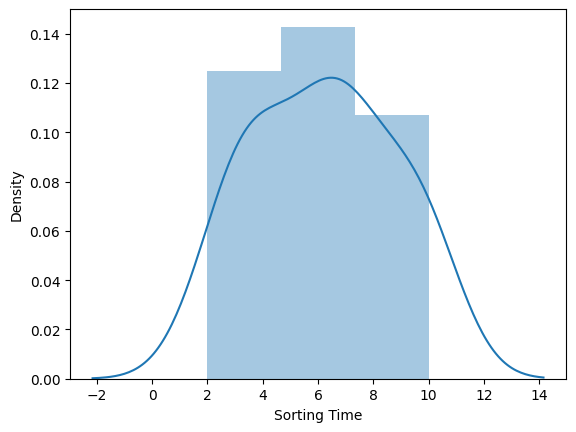

In [5]:
sns.distplot(data['Sorting Time'])

In [ ]:
## Feature Engineering

In [6]:
data=data.rename({'Delivery Time': 'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

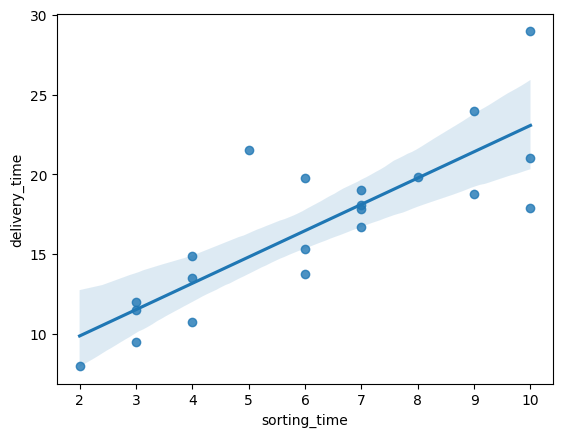

In [8]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
## Model Bulding

In [9]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [10]:
## model testing
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [12]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [13]:
## Model Predict
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [14]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [15]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [20]:
#Transforming variables for accuracy
model1 = smf.ols("np.log(delivery_time)~sorting_time", data=data).fit()

print(model1.params)

Intercept       2.121372
sorting_time    0.105552
dtype: float64


In [21]:
model1.rsquared , model1.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [22]:
model2 = smf.ols("delivery_time~np.log(sorting_time)", data=data).fit()

print(model2.params)

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64


In [23]:
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [24]:
#apply Quadratic model on this model
model3 = smf.ols("delivery_time~sorting_time+I(sorting_time**2)", data=data).fit()

In [25]:
model3.params

Intercept               3.522234
sorting_time            2.813002
I(sorting_time ** 2)   -0.093198
dtype: float64

In [26]:
model3.rsquared , model3.rsquared_adj

(0.6934396274520247, 0.659377363835583)

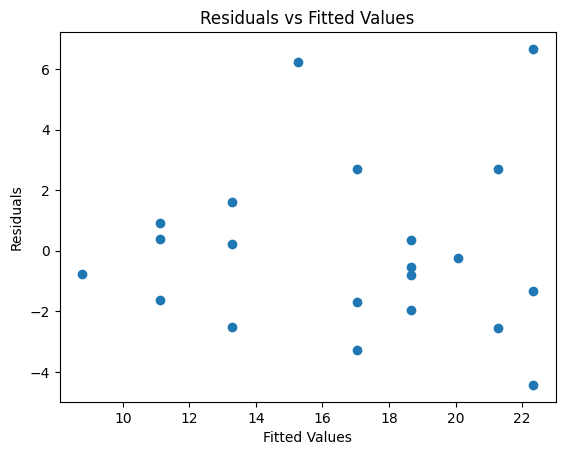

In [27]:
import matplotlib.pyplot as plt


fitted_values = model3.predict()

residuals = data['delivery_time'] - fitted_values


plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


# Q2)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


C:\Users\abay_\AppData\Local\Temp\ipykernel_20472\1217533133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

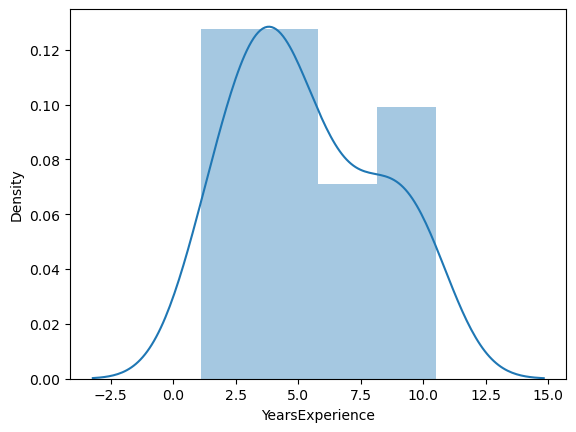

In [9]:
sns.distplot(data['YearsExperience'])

C:\Users\abay_\AppData\Local\Temp\ipykernel_20472\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

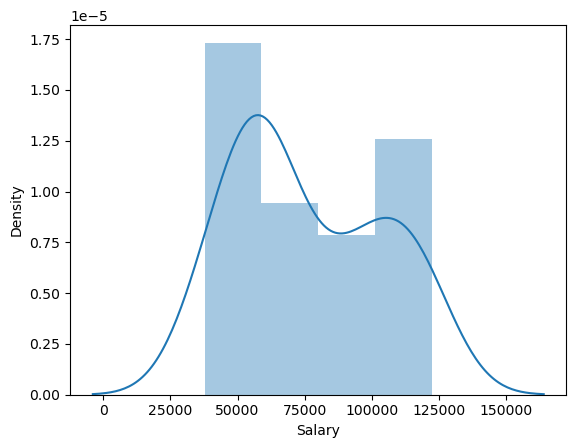

In [10]:
sns.distplot(data['Salary'])

In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='YearsExperience'>

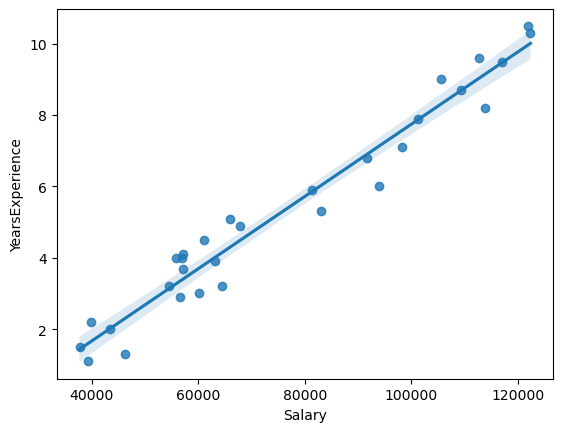

In [12]:
sns.regplot(x=data['Salary'],y=data['YearsExperience'])

In [13]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [14]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [15]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [16]:
new_data=pd.Series([2,5])
new_data

0    2
1    5
dtype: int64

In [17]:
new_data=pd.DataFrame(new_data,columns=['YearsExperience'])
new_data

,YearsExperience
0,2
1,5


In [18]:
model.predict(new_data)

0    44692.124842
1    73042.011806
dtype: float64

In [19]:
#Transforming variables for accuracy
model1=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()

In [20]:
print(model1.params)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64


In [21]:
model1.rsquared , model1.rsquared_adj

(0.9319671194084194, 0.9295373736730057)

In [22]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [23]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [24]:
model2.rsquared , model2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [25]:
#apply Quadratic model on this model
model3=smf.ols("Salary~YearsExperience+YearsExperience*YearsExperience",data=data).fit()

In [26]:
model3.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model3.rsquared , model3.rsquared_adj

(0.9569566641435086, 0.9554194021486339)